# Analysis of Vehicles dataset (Beginner's Analysis)

1.2 Million Used Car Listings
1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model

link: https://www.kaggle.com/jpayne/852k-used-car-listings

In [1]:
import sys
print(sys.executable)

E:\ProgramData\Anaconda3\python.exe


## 1. First we import necessary Libaries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

## 2.Reading and Exploring the Data

### Load Vehicles Data

In [3]:
vehicles = pd.read_csv("datasets/true_car_listings.csv")
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [4]:
vehicles.sample(5)

Price  Year  Mileage         City State                Vin       Make  \
48152   39551  2016     8300   Burlingame    CA  5UXWX7C56G0S17504        BMW   
742045  16495  2013    79484   Zanesville    OH  JF2GPAGC0D2210545     Subaru   
776784   8999  2008    82395    Hawthorne    CA  JTDKB20U887757460     Toyota   
441017   9989  2013    73801  Cherry Hill    NJ  5NPDH4AE3DH330753    Hyundai   
128856   8995  2014    70665        Milan    MI  1G1PA5SH7E7238155  Chevrolet   

                 Model  
48152      X3xDrive35i  
742045              XV  
776784        Prius5dr  
441017  ElantraLimited  
128856         CruzeLS

In [5]:
vehicles.describe()

Price           Year       Mileage
count  852122.000000  852122.000000  8.521220e+05
mean    21464.100210    2013.289145  5.250779e+04
std     13596.202241       3.414987  4.198896e+04
min      1500.000000    1997.000000  5.000000e+00
25%     13000.000000    2012.000000  2.383600e+04
50%     18500.000000    2014.000000  4.025600e+04
75%     26995.000000    2016.000000  7.218600e+04
max    499500.000000    2018.000000  2.856196e+06

In [6]:
vehicles.shape

(852122, 8)

## 3 Dataset for car from 1970 and price is not greater than 50k

### 3.1 Data Analysis

In [7]:
vehicle_top_price = vehicles.loc[(vehicles.Year>=1970) & (vehicles.Price>=1000) & (vehicles.Price<=50000) 
                                 & (vehicles.Mileage<=300000)].loc[:, ['Price', 'Year', 
                                                                                'Mileage', 'City', 'State', 'Make', 'Model']]
vehicle_top_price.shape

(830059, 7)

In [8]:
vehicle_top_price.sample(5)

Price  Year  Mileage        City State      Make               Model
331307  30595  2014     6782   Fairbanks    AK      Ford  MustangConvertible
415890  12789  2011   121468   Chantilly    VA     Honda          Odyssey5dr
229322  14250  2015    53038  Fort Wayne    IN     Dodge          JourneySXT
379876  13500  2013    16381     Norwood    MA     Honda               Civic
73816   34988  2016      551  Mt. Juliet    TN  Cadillac                 ATS

In [9]:
vehicle_top_price.describe()

Price           Year        Mileage
count  830059.000000  830059.000000  830059.000000
mean    20210.714328    2013.237171   53198.364920
std      9732.591999       3.420433   40821.316722
min      1500.000000    1997.000000       5.000000
25%     12995.000000    2012.000000   24558.000000
50%     18000.000000    2014.000000   40957.000000
75%     26020.500000    2016.000000   73322.000000
max     50000.000000    2018.000000  300000.000000

In [10]:
vehicle_top_price.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Make       object
Model      object
dtype: object

### 3.2 Cleaning of data

In [11]:
# https://stackoverflow.com/a/45355563/2049763
vehicle_top_price = vehicle_top_price.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [12]:
for col in ['City', 'Make', 'Model']:
    vehicle_top_price[col] = vehicle_top_price[col].apply(lambda x: x.lower())

In [13]:
from collections import Counter

In [14]:
selector = vehicle_top_price['State'] == "CO"
Counter(selector)

Counter({False: 807611, True: 22448})

In [15]:
state_list = vehicle_top_price['State'].unique().tolist()
state_list.sort()
len(state_list), ", ".join(state_list)

(59,
 'AK, AL, AR, AZ, Az, CA, CO, CT, Ca, DC, DE, FL, Fl, GA, Ga, HI, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, Md, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, Oh, PA, RI, SC, SD, TN, TX, UT, VA, VT, Va, WA, WI, WV, WY, ga')

In [16]:
vehicle_top_price.loc[(vehicle_top_price['State'] == 'Oh'), 'State'] = 'OH'
vehicle_top_price.loc[(vehicle_top_price['State'] == 'Va'), 'State'] = 'VA'
vehicle_top_price.loc[(vehicle_top_price['State'] == 'Md'), 'State'] = 'MD'
vehicle_top_price.loc[(vehicle_top_price['State'] == 'Ca'), 'State'] = 'CA'
vehicle_top_price.loc[(vehicle_top_price['State'] == 'Ga'), 'State'] = 'GA'
vehicle_top_price.loc[(vehicle_top_price['State'] == 'ga'), 'State'] = 'GA'
vehicle_top_price.loc[(vehicle_top_price['State'] == 'Fl'), 'State'] = 'FL'
vehicle_top_price.loc[(vehicle_top_price['State'] == 'Az'), 'State'] = 'AZ'

#### 3.2.2 Drop Null

In [17]:
vehicle_top_price.isnull().any()

Price      False
Year       False
Mileage    False
City       False
State      False
Make       False
Model      False
dtype: bool

In [18]:
vehicle_top_price.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Make       0
Model      0
dtype: int64

In [19]:
# lets drop null rows
vehicle_top_price = vehicle_top_price.dropna()

In [20]:
vehicle_top_price.shape

(830059, 7)

In [21]:
vehicle_top_price.sample(5)

Price  Year  Mileage         City State        Make          Model
535353   9875  2010    75389       hoover    AL         kia          forte
837293  19495  2017    11728   west islip    NY  volkswagen  golfwolfsburg
386929  11708  2014    56820  jersey city    NJ       honda         accord
347774  39995  2011    69758    blackwood    NJ        ford          super
444863   9500  2016    44818  placerville    CA     hyundai       accentse

### 3.4 EDA

In [22]:
import pandas_profiling as pp

In [23]:
profile = pp.ProfileReport(vehicle_top_price, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()
# profile.to_notebook_iframe()

### 3.3 Normalize the Data
Used Cars Price Prediction by 15 models
https://www.kaggle.com/vbmokin/used-cars-price-prediction-by-15-models

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [25]:
car_price_mean = vehicle_top_price['Price'].mean()
vehicle_top_price['Price'] = (vehicle_top_price['Price'] / car_price_mean).astype('float64')

In [26]:
car_year_min = vehicle_top_price['Year'].min()
vehicle_top_price['Year'] = (vehicle_top_price['Year'] - car_year_min).astype(int)

In [27]:
car_mileage_mean = vehicle_top_price['Mileage'].mean()
vehicle_top_price['Mileage'] = (vehicle_top_price['Mileage'] / car_mileage_mean).astype('float64')

In [28]:
# # perform one hot encoding on multiple categorical columns: https://datascience.stackexchange.com/a/71805
# # https://stackoverflow.com/a/44601764
# vehicle_top_price = pd.get_dummies(vehicle_top_price, columns=['City', 'State', 'Make', 'Model'], drop_first=True)
# vehicle_top_price.columns

In [29]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

label_encoder = {}
for col in ['City', 'State', 'Make', 'Model']:
    label_encoder[col] = LabelEncoder()
    label_encoder[col].fit(list(vehicle_top_price[col].astype(str).values))
    vehicle_top_price[col] = label_encoder[col].transform(list(vehicle_top_price[col].astype(str).values))
    label_encoder[col].get_params()

In [30]:
vehicle_top_price.sample(5)

Price  Year   Mileage  City  State  Make  Model
29448   1.136377    17  0.729440  1867     43     6     57
426876  0.348083    14  3.753668  1083     15    19    574
198966  1.335480    18  0.510805  1321      9    10     62
106485  1.109758    20  0.050622  1930     43     9    767
31337   1.235830    17  0.587198  1312     16     6     57

In [31]:
vehicle_top_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830059 entries, 0 to 852112
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Price    830059 non-null  float64
 1   Year     830059 non-null  int32  
 2   Mileage  830059 non-null  float64
 3   City     830059 non-null  int64  
 4   State    830059 non-null  int64  
 5   Make     830059 non-null  int64  
 6   Model    830059 non-null  int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 47.5 MB


In [32]:
vehicle_top_price.corr()

Price      Year   Mileage      City     State      Make     Model
Price    1.000000  0.501307 -0.505003 -0.016016  0.030117 -0.084118  0.088167
Year     0.501307  1.000000 -0.782312  0.009847 -0.022395  0.024797 -0.025911
Mileage -0.505003 -0.782312  1.000000 -0.012977  0.026031 -0.034903  0.052099
City    -0.016016  0.009847 -0.012977  1.000000 -0.044262  0.007023 -0.003807
State    0.030117 -0.022395  0.026031 -0.044262  1.000000 -0.003891  0.005186
Make    -0.084118  0.024797 -0.034903  0.007023 -0.003891  1.000000  0.034576
Model    0.088167 -0.025911  0.052099 -0.003807  0.005186  0.034576  1.000000

In [33]:
vehicle_top_price.describe()

Price           Year        Mileage           City  \
count  830059.000000  830059.000000  830059.000000  830059.000000   
mean        1.000000      16.237171       1.000000    1166.904992   
std         0.481556       3.420433       0.767342     679.280206   
min         0.074218       0.000000       0.000094       0.000000   
25%         0.642976      15.000000       0.461631     559.000000   
50%         0.890617      17.000000       0.769892    1153.000000   
75%         1.287461      19.000000       1.378275    1743.000000   
max         2.473935      21.000000       5.639271    2406.000000   

               State           Make          Model  
count  830059.000000  830059.000000  830059.000000  
mean       23.809676      23.857699    1166.079428  
std        15.328964      14.752675     707.067740  
min         0.000000       0.000000       0.000000  
25%         9.000000      11.000000     577.000000  
50%        23.000000      19.000000    1051.000000  
75%        38.000000      37.000000    1851.000000  
max        50.000000      52.000000    2515.000000

### 3.4 EDA

In [34]:
import seaborn as sns
import statsmodels.graphics.api as smg

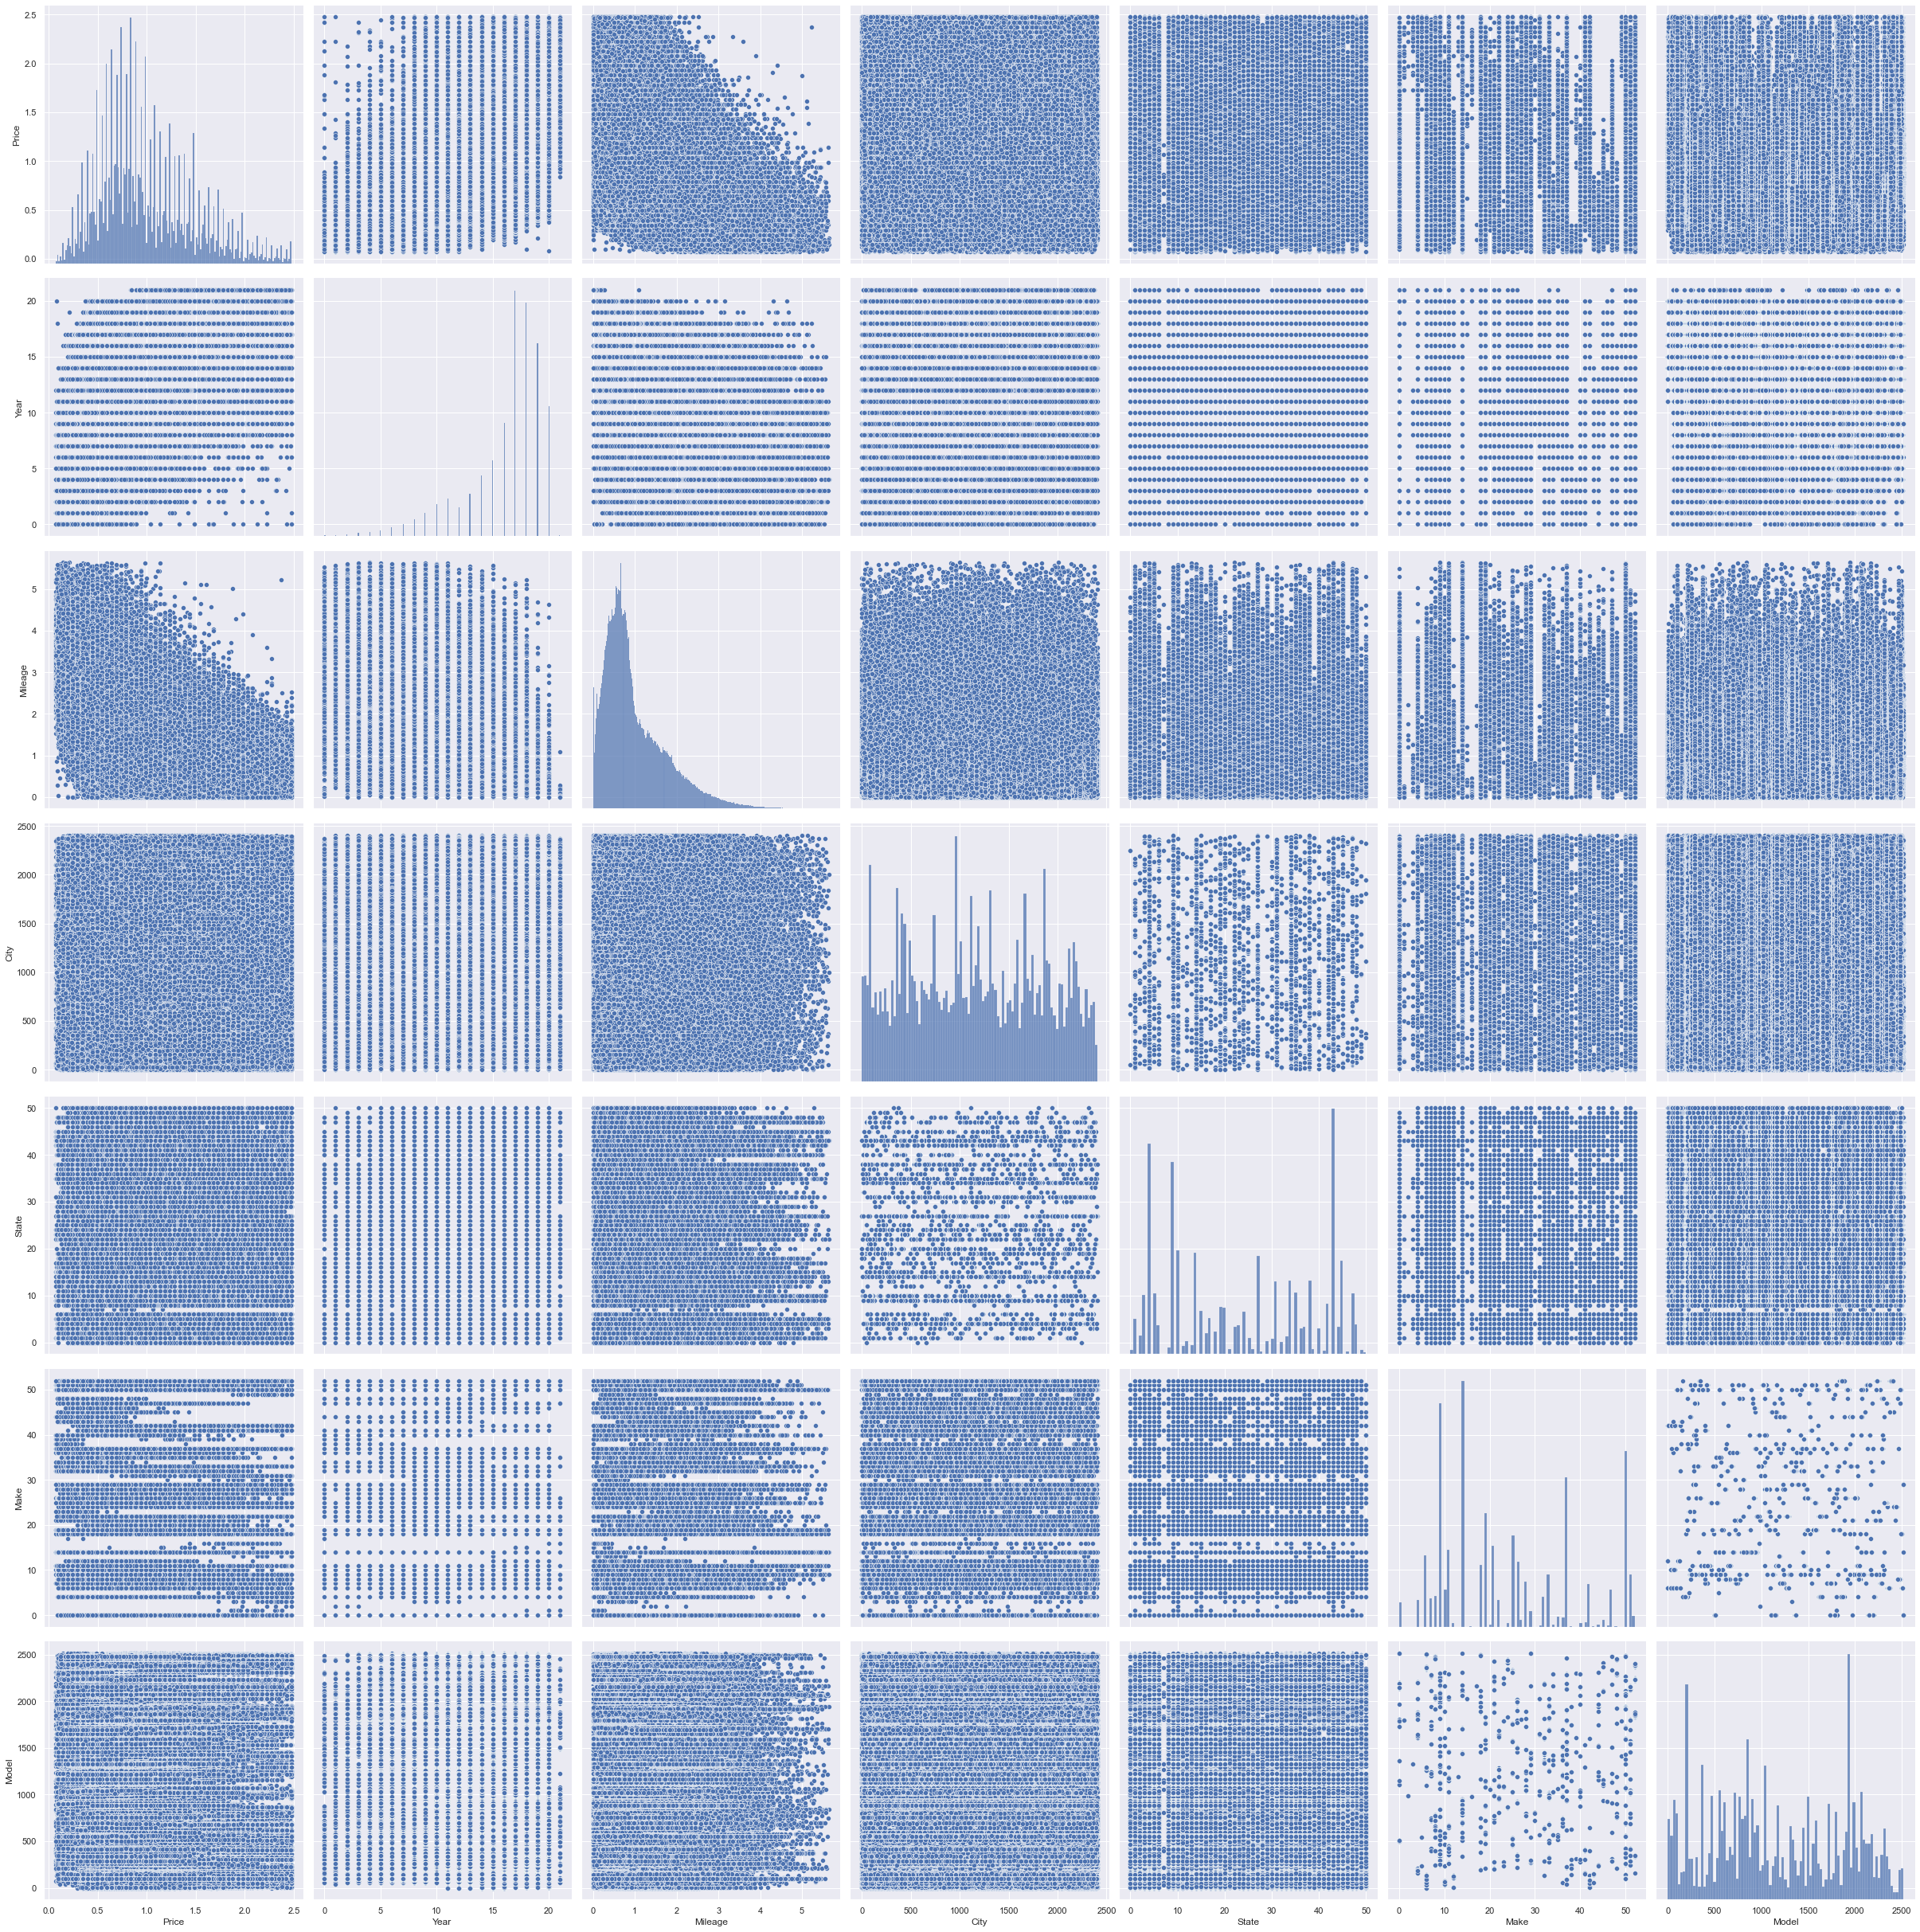

In [35]:
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_theme()

# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# sns.pairplot(vehicle_top_price, hue="Price", diag_kind="hist")
g = sns.pairplot(vehicle_top_price)
g.fig.set_size_inches(35,35)

In [36]:
profile_n = pp.ProfileReport(vehicle_top_price, title='Pandas Profiling Report')
profile_n.to_widgets()

### 3.5 Regression 

In [ ]:
from sklearn.model_selection import KFold, train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR

from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 

from sklearn.tree import DecisionTreeRegressor

In [ ]:
def acc_d(y_meas, pred_y):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, pred_y)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, pred_y):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, pred_y))**0.5

In [ ]:
def accuracy_model(kf5, Model, feature, target):
    r2_scores, rmse = [], []
    for train_index, test_index in kf5.split(feature):
        train_x = np.array(feature.iloc[train_index][:])
        test_x  = np.array(feature.iloc[test_index][:])

        train_y =  target.iloc[train_index][:]
        test_y  =  target.iloc[test_index][:]

        model = Model().fit(train_x, train_y)
        
        pred_train = model.predict(train_x)
        pred_y = model.predict(test_x)
        
        print("\n# training performance")
        acc_train_r2_num = round(r2_score(train_y, pred_train) * 100, 2)
        print('acc(r2_score) for training =', acc_train_r2_num)  
        
        acc_train_d_num = round(acc_d(train_y, pred_train) * 100, 2)
        print('acc(relative error) for training =', acc_train_d_num)  
        
        acc_train_rmse_num = round(acc_rmse(train_y, pred_train) * 100, 2)
        print('acc(rmse) for training =', acc_train_rmse_num) 
        
        print("# Test performance")
        acc_train_r2_num = round(r2_score(test_y, pred_y) * 100, 2)
        print('acc(r2_score) for testing =', acc_train_r2_num)  
        r2_scores.append(acc_train_r2_num)
        
        acc_train_d_num = round(acc_d(test_y, pred_y) * 100, 2)
        print('acc(relative error) for testing =', acc_train_d_num)  
        
        acc_train_rmse_num = round(acc_rmse(test_y, pred_y) * 100, 2)
        print('acc(rmse) for testing =', acc_train_rmse_num) 
        rmse.append(acc_train_rmse_num)        

    print("\nAvg R2 Score:", round(np.mean(r2_scores), 3))
    
    rmse_mean = np.mean(rmse) 
    print("Avg RMSE (normalized): {} & in $ value: {}".format(round(rmse_mean, 3), 
                                                              round(rmse_mean * car_price_mean / 100, 3)))

In [ ]:
#added some parameters
# https://stackoverflow.com/a/45116022
k_fold_5 = KFold(n_splits = 5, shuffle = True, random_state = 2)

In [ ]:
target_name = 'Price'
train_target = vehicle_top_price[target_name]

vehicle_top_price = vehicle_top_price.drop([target_name], axis=1)
vehicle_top_price.sample(5)

In [ ]:
train0, test0, train_target0, test_target0 = train_test_split(vehicle_top_price, 
                                                              train_target, test_size=0.2, random_state=0)

In [ ]:
# models = []
# SVR, 
for Model in [LinearRegression, LinearSVR, SGDRegressor, DecisionTreeRegressor, RandomForestRegressor, 
              BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor]:    
    print("\n# Training for {} starting ****".format(Model))
    
#     if Model == RidgeCV:
#         model = Model(cv=5)
#     else:
#         model = Model() 
    accuracy_model(k_fold_5, Model, train0, train_target0)
    
#     if Model == RandomForestRegressor:
#         print(model.best_params_)
#     models.append(model)

In [ ]:
# mlp = MLPRegressor()
# param_grid = {'hidden_layer_sizes': [i for i in range(2,20)],
#               'activation': ['relu'],
#               'solver': ['adam'],
#               'learning_rate': ['constant'],
#               'learning_rate_init': [0.01],
#               'power_t': [0.5],
#               'alpha': [0.0001],
#               'max_iter': [1000],
#               'early_stopping': [True],
#               'warm_start': [False]}
# mlp_GS = GridSearchCV(mlp, param_grid=param_grid, 
#                    cv=10, verbose=True, pre_dispatch='2*n_jobs')
# accuracy_model(k_fold_5, mlp_GS, vehicle_top_price, train_target)

In [ ]:
# Voting_Reg = VotingRegressor(estimators=[('lin', linreg), ('ridge', ridge), ('sgd', sgd)])

In [ ]:
random_forest_regressor = RandomForestRegressor().fit(train0, train_target0)
pred_y = random_forest_regressor.predict(test0)

print("# Test performance")
acc_train_r2_num = round(r2_score(test_target0, pred_y) * 100, 2)
print('acc(r2_score) for testing =', acc_train_r2_num)  

acc_train_d_num = round(acc_d(test_target0, pred_y) * 100, 2)
print('acc(relative error) for testing =', acc_train_d_num)  

acc_train_rmse_num = round(acc_rmse(test_target0, pred_y) * 100, 2)
print('acc(rmse) for testing =', acc_train_rmse_num, "$", round(acc_train_rmse_num * car_price_mean / 100, 3)) 